# Profit estimation of companies with linear regression

In [2]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

loading the dataset

In [33]:
companies = pd.read_csv('1000_Companies.csv')
companies.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


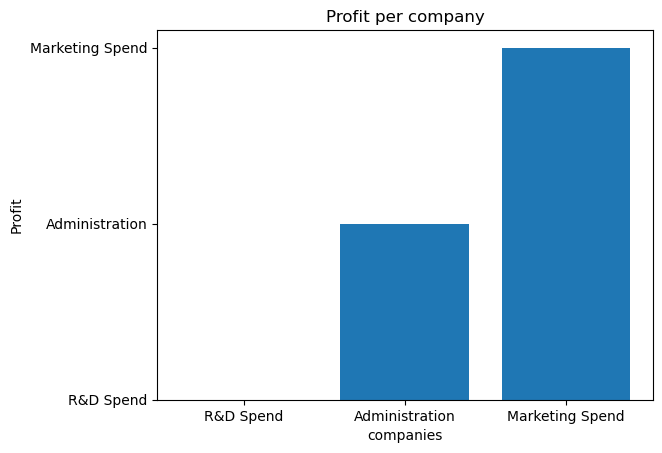

In [36]:
import matplotlib.pyplot as plt

x_axis = ['R&D Spend', 'Administration', 'Marketing Spend']
y_axis = ['R&D Spend', 'Administration', 'Marketing Spend']

plt.bar(x_axis, y_axis)
plt.title('Profit per company')
plt.xlabel('companies')
plt.ylabel('Profit')
plt.show()

<AxesSubplot:>

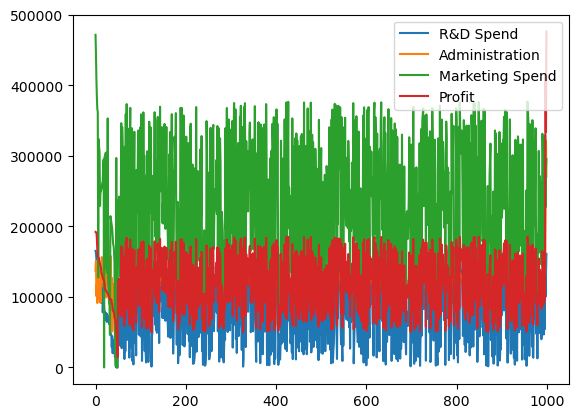

In [37]:
companies.plot()

We compare 1000jobs and we found out that profits in marketing are around 30 000$ compare to administration where it is 100-150000$ and others0

Observing Correlation between Columns

In [28]:
companies[['R&D Spend','Administration','Marketing Spend']].corr()

,R&D Spend,Administration,Marketing Spend
R&D Spend,1.000000,0.582434,0.978407
Administration,0.582434,1.000000,0.520465
Marketing Spend,0.978407,0.520465,1.000000


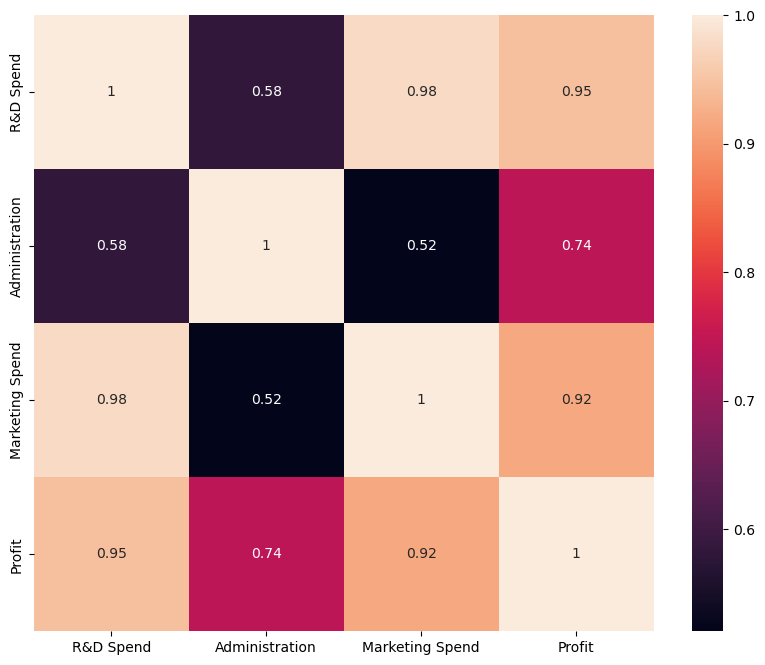

In [29]:
# Plot the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(companies.corr(), annot=True)

# Show the plot
plt.show()

barchart


removing column due to high correlation

In [6]:
companies.drop(['Marketing Spend'],axis=1,inplace=True)

In [7]:
companies

,R&D Spend,Administration,State,Profit
0,165349.20,136897.800,New York,192261.83000
1,162597.70,151377.590,California,191792.06000
2,153441.51,101145.550,Florida,191050.39000
3,144372.41,118671.850,New York,182901.99000
4,142107.34,91391.770,Florida,166187.94000
...,...,...,...,...
995,54135.00,118451.999,California,95279.96251
996,134970.00,130390.080,California,164336.60550
997,100275.47,241926.310,California,413956.48000
998,128456.23,321652.140,California,333962.19000


Encoding Data

Okay, let's pretend that we have a list of different types of fruit. Some of the fruits in the list might be apples, bananas, and cherries.
But a computer can't understand what "apple", "banana", and "cherries" mean. It can only understand numbers. So, what this code does is it takes the list of fruit and turns each type of fruit into a number.
For example, it might turn "apple" into a 1, "banana"

The code dummies=pd.get_dummies(companies.State) creates a new DataFrame dummies by converting categorical data in the State column of the companies DataFrame into numerical data using one-hot encoding.

pd.get_dummies is a function in pandas that takes in a column with categorical data, such as a column of state names, and converts it into a matrix of binary variables, with a column for each unique category in the original column. The resulting columns are binary, meaning that each cell in a column will contain a 1 if the original value in the State column matches the column name, and 0 otherwise. This allows machine learning algorithms to work with categorical data, which they can't process in its original form.
In this case, the dummies DataFrame will contain columns for each unique state in the State column of the companies DataFrame, with a 1 in the cell of the corresponding row and column if the state in that row matches the column name, and a 0 otherwise.

In [9]:
dummies=pd.get_dummies(companies.State)

In [10]:
companies=pd.concat([companies,dummies],axis=1)

In [11]:
companies

,R&D Spend,Administration,State,Profit,California,Florida,New York
0,165349.20,136897.800,New York,192261.83000,0,0,1
1,162597.70,151377.590,California,191792.06000,1,0,0
2,153441.51,101145.550,Florida,191050.39000,0,1,0
3,144372.41,118671.850,New York,182901.99000,0,0,1
4,142107.34,91391.770,Florida,166187.94000,0,1,0
...,...,...,...,...,...,...,...
995,54135.00,118451.999,California,95279.96251,1,0,0
996,134970.00,130390.080,California,164336.60550,1,0,0
997,100275.47,241926.310,California,413956.48000,1,0,0
998,128456.23,321652.140,California,333962.19000,1,0,0


In [12]:
companies.drop(['State'],axis=1,inplace=True)
companies

,R&D Spend,Administration,Profit,California,Florida,New York
0,165349.20,136897.800,192261.83000,0,0,1
1,162597.70,151377.590,191792.06000,1,0,0
2,153441.51,101145.550,191050.39000,0,1,0
3,144372.41,118671.850,182901.99000,0,0,1
4,142107.34,91391.770,166187.94000,0,1,0
...,...,...,...,...,...,...
995,54135.00,118451.999,95279.96251,1,0,0
996,134970.00,130390.080,164336.60550,1,0,0
997,100275.47,241926.310,413956.48000,1,0,0
998,128456.23,321652.140,333962.19000,1,0,0


Scaling

In [13]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
companies[['R&D Spend','Administration']]=scale.fit_transform(companies[['R&D Spend','Administration']])

Specifying X and y

In [14]:


y=companies.iloc[:,2].values
y

array([192261.83   , 191792.06   , 191050.39   , 182901.99   ,
       166187.94   , 156991.12   , 156122.51   , 155752.6    ,
       152211.77   , 149759.96   , 146121.95   , 144259.4    ,
       141585.52   , 134307.35   , 132602.65   , 129917.04   ,
       126992.93   , 125370.37   , 124266.9    , 122776.86   ,
       118474.03   , 111313.02   , 110352.25   , 108733.99   ,
       108552.04   , 107404.34   , 105733.54   , 105008.31   ,
       103282.38   , 101004.64   ,  99937.59   ,  97483.56   ,
        97427.84   ,  96778.92   ,  96712.8    ,  96479.51   ,
        90708.19   ,  89949.14   ,  81229.06   ,  81005.76   ,
        78239.91   ,  77798.83   ,  71498.49   ,  69758.98   ,
        65200.33   ,  64926.08   ,  49490.75   ,  42559.73   ,
        35673.41   ,  14681.4    , 123485.2464 ,  82155.48418,
       125867.0108 , 104976.1696 ,  89803.10053,  75297.23305,
       114284.5283 , 171985.0761 ,  72337.96774, 169566.5772 ,
       158670.9451 , 114522.8756 ,  85842.60573, 101106

In [15]:
companies.drop(['Profit'],axis=1,inplace=True)
companies

,R&D Spend,Administration,California,Florida,New York
0,1.000000,0.316659,0,0,1
1,0.983359,0.370214,1,0,0
2,0.927985,0.184424,0,1,0
3,0.873136,0.249247,0,0,1
4,0.859438,0.148348,0,1,0
...,...,...,...,...,...
995,0.327398,0.248434,1,0,0
996,0.816272,0.292589,1,0,0
997,0.606447,0.705122,1,0,0
998,0.776878,1.000000,1,0,0


In [16]:
X=companies.iloc[:,:].values
X.shape

(1000, 5)

splitting dataset into train and test

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

fitting model to training set

In [18]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

predicting the test dataset

In [20]:
y_pred = lin_reg.predict(X_test)

finding coefficients and intercepts

In [21]:
# coefficient 
print(lin_reg.coef_)

[ 1.20926284e+05  2.29939276e+05 -1.73663030e+17 -1.73663030e+17
 -1.73663030e+17]


In [22]:
# intercepts
print(lin_reg.intercept_)

1.7366303042530608e+17


evaluating the model

In [23]:
# calculating the  R squared error
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9223332320226605

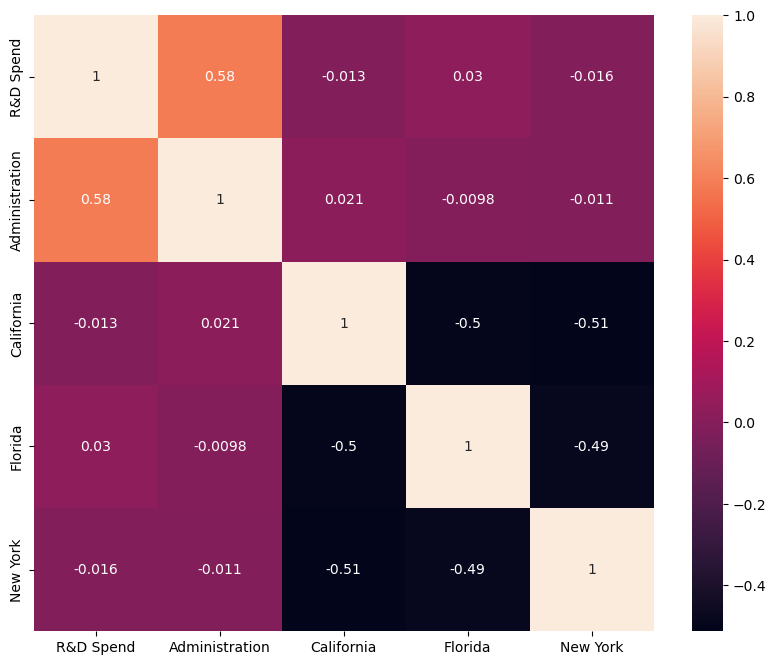

We compare 1000jobs and we found out that profits in marketing are around 30 000$ compare to administration where it is 100-150000$ and others.